In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
bs = pd.read_csv('bestsellers with categories.csv')

In [17]:
#Checking the head of the dataframe
bs.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [18]:
#The number of entries
#550 entries
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [19]:
#Generate descriptive statistics
bs.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
#The book with the highest count of reviews
bs[bs['Reviews'] == bs['Reviews'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [21]:
#Distinct count of bestsellers
bs['Name'].nunique()

351

In [23]:
#Distinct count of authors
bs['Author'].nunique()

248

In [8]:
#The top 5 most common authors in the bestsellers list
bs['Author'].value_counts().head(5)

Jeff Kinney                           12
Suzanne Collins                       11
Rick Riordan                          11
Gary Chapman                          11
American Psychological Association    10
Name: Author, dtype: int64

In [9]:
#Books with more than five occurences during the ten year date range
bs.Name.value_counts().reset_index(name="count").query("count > 5")


,index,count
0,Publication Manual of the American Psychologic...,10
1,StrengthsFinder 2.0,9
2,"Oh, the Places You'll Go!",8
3,The 7 Habits of Highly Effective People: Power...,7
4,The Very Hungry Caterpillar,7
5,The Four Agreements: A Practical Guide to Pers...,6
6,Jesus Calling: Enjoying Peace in His Presence ...,6


In [10]:
#The average user ratings, review counts and prices by year
bs_by_year = bs.groupby('Year')
bs_by_year.mean()

,User Rating,Reviews,Price
Year,,,
2009,4.584,4710.12,15.40
2010,4.558,5479.62,13.48
2011,4.558,8100.82,15.10
2012,4.532,13090.92,15.30
2013,4.554,13098.14,14.60
2014,4.622,15859.94,14.64
2015,4.648,14233.38,10.42
2016,4.678,14196.00,13.18
2017,4.660,12888.40,11.38


In [24]:
#The top five bestsellers by highest review count - grouped by year
bs.sort_values(['Year', 'Reviews'], ascending=False).groupby('Year').head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
491,The Wonky Donkey,Craig Smith,4.8,30183,4,2019,Fiction
98,Educated: A Memoir,Tara Westover,4.7,28729,15,2019,Non Fiction
462,The Silent Patient,Alex Michaelides,4.5,27536,14,2019,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
490,The Wonky Donkey,Craig Smith,4.8,30183,4,2018,Fiction
97,Educated: A Memoir,Tara Westover,4.7,28729,15,2018,Non Fiction
465,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2018,Non Fiction
220,Little Fires Everywhere,Celeste Ng,4.5,25706,12,2018,Fiction


Text(0.5, 1.0, 'Distribution Plot of Review Count')

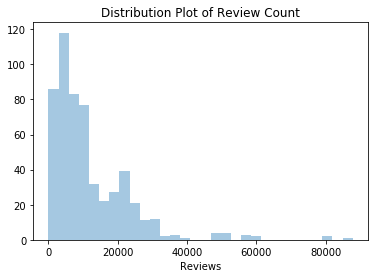

In [32]:
#Distribution plot of Review Count
sns.distplot(bs['Reviews'], bins=30, kde=False)
plt.title('Distribution Plot of Review Count')

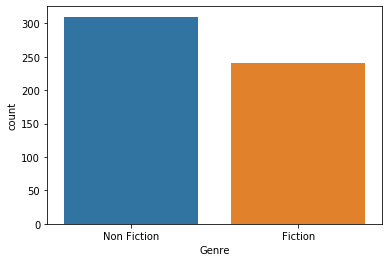

In [37]:
#Countplot by Genre
sns.countplot(x='Genre', data=bs)

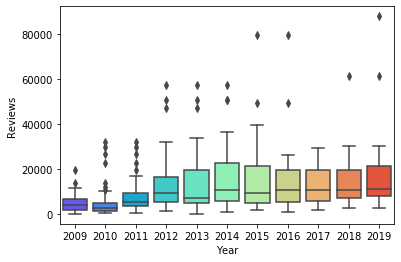

In [36]:
#convert Year column from int to string
bs.Year = bs.Year.astype(str)
#Barplot 
sns.boxplot(x='Year', y='Reviews', data=bs, palette='rainbow')

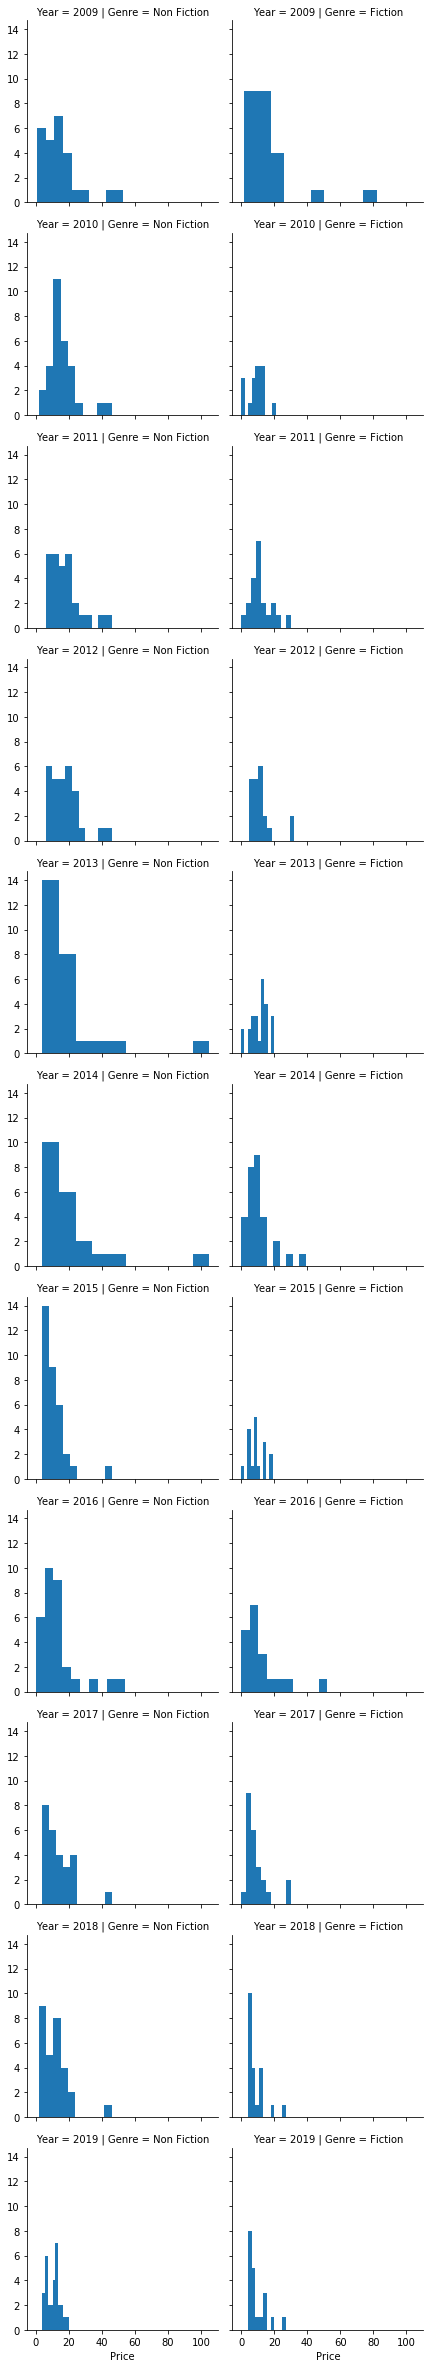

In [53]:
#Facet grid
g = sns.FacetGrid(data=bs, col='Genre', row='Year')
g.map(plt.hist, 'Price').add_legend()

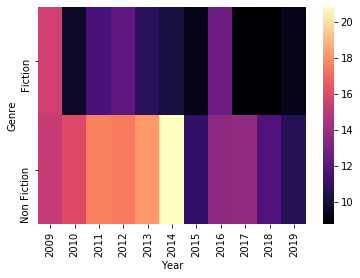

In [52]:
#Heat map
bspv = bs.pivot_table(values='Price', index='Genre', columns='Year')
sns.heatmap(bspv, cmap='magma')